In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from dateutil.relativedelta import relativedelta
import warnings    
import math
import time
import re
import os
import pickle
from math import pi

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')
plt.style.use(style = 'tableau-colorblind10')
plt.rcParams['figure.figsize'] = (15, 10)
os.getcwd()
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'customer_churn.ipynb',
 'customer_segmentation.ipynb',
 'Data',
 'Results']

In [2]:
file_path = '\\Data\\Transactions.csv'

dtypes = {'transaction_id' : str, 'cust_id' : str, 'tran_date' : str, 'prod_subcat_code' : str,
          'prod_cat_code' : str, 'Qty' : float, 'Rate' : float, 'Tax' : float, 'total_amt' : float,
          'Store_type' : str}

In [3]:
transactions = pd.read_csv(os.getcwd()+file_path, dtype = dtypes)
transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5.0,-772.0,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5.0,-1497.0,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2.0,-791.0,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3.0,-1363.0,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2.0,-791.0,166.110,-1748.110,TeleShop


In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  object 
 1   cust_id           23053 non-null  object 
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  object 
 4   prod_cat_code     23053 non-null  object 
 5   Qty               23053 non-null  float64
 6   Rate              23053 non-null  float64
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.8+ MB


In [5]:
transactions.isna().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
dtype: int64

In [6]:
file_path = '\\Data\\Customer.csv'

dtypes = {'customer_Id' : str, 'DOB' : str, 'Gender' : str, 'city_code' : str}

In [7]:
customer = pd.read_csv(os.getcwd()+file_path, dtype = dtypes)
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4
1,269696,07-01-1970,F,8
2,268159,08-01-1970,F,8
3,270181,10-01-1970,F,2
4,268073,11-01-1970,M,1


In [8]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_Id  5647 non-null   object
 1   DOB          5647 non-null   object
 2   Gender       5645 non-null   object
 3   city_code    5645 non-null   object
dtypes: object(4)
memory usage: 176.6+ KB


In [9]:
customer.isna().sum()

customer_Id    0
DOB            0
Gender         2
city_code      2
dtype: int64

In [10]:
file_path = '\\Data\\prod_cat_info.csv'

dtypes = {'prod_cat_code' : str, 'prod_cat' : str, 'prod_sub_cat_code' : str, 'prod_subcat' : str}

In [11]:
product = pd.read_csv(os.getcwd()+file_path, dtype = dtypes)
product.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [12]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     object
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     object
 3   prod_subcat        23 non-null     object
dtypes: object(4)
memory usage: 864.0+ bytes


In [13]:
product.isna().sum()

prod_cat_code        0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

In [14]:
full_data = pd.merge(transactions, customer, how='left', left_on=['cust_id'], right_on=['customer_Id'])
full_data['product_code'] = full_data['prod_cat_code'] + full_data['prod_subcat_code']

product['product_code'] = product['prod_cat_code'] + product['prod_sub_cat_code']

full_data = pd.merge(full_data, product[['product_code', 'prod_cat','prod_subcat']], how='left',
                     on = 'product_code')
full_data.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,product_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5.0,-772.0,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5,11,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5.0,-1497.0,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8,35,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2.0,-791.0,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8,56,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3.0,-1363.0,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3,611,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2.0,-791.0,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8,56,Books,DIY


In [15]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  object 
 1   cust_id           23053 non-null  object 
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  object 
 4   prod_cat_code     23053 non-null  object 
 5   Qty               23053 non-null  float64
 6   Rate              23053 non-null  float64
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
 10  customer_Id       23053 non-null  object 
 11  DOB               23053 non-null  object 
 12  Gender            23044 non-null  object 
 13  city_code         23045 non-null  object 
 14  product_code      23053 non-null  object 
 15  prod_cat          23053 non-null  object 
 16  prod_subcat       23053 non-null  object

In [16]:
full_data['tran_date'] = pd.to_datetime(full_data['tran_date'])
full_data.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,product_code,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5.0,-772.0,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5,11,Clothing,Women
1,29258453508,270384,2014-02-27,5,3,-5.0,-1497.0,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8,35,Electronics,Computers
2,51750724947,273420,2014-02-24,6,5,-2.0,-791.0,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8,56,Books,DIY
3,93274880719,271509,2014-02-24,11,6,-3.0,-1363.0,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3,611,Home and kitchen,Bath
4,51750724947,273420,2014-02-23,6,5,-2.0,-791.0,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8,56,Books,DIY


In [17]:
full_data['product_code_name'] = full_data['prod_cat'] + '_' + full_data['prod_subcat']
full_data.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,product_code,prod_cat,prod_subcat,product_code_name
0,80712190438,270351,2014-02-28,1,1,-5.0,-772.0,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5,11,Clothing,Women,Clothing_Women
1,29258453508,270384,2014-02-27,5,3,-5.0,-1497.0,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8,35,Electronics,Computers,Electronics_Computers
2,51750724947,273420,2014-02-24,6,5,-2.0,-791.0,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8,56,Books,DIY,Books_DIY
3,93274880719,271509,2014-02-24,11,6,-3.0,-1363.0,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3,611,Home and kitchen,Bath,Home and kitchen_Bath
4,51750724947,273420,2014-02-23,6,5,-2.0,-791.0,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8,56,Books,DIY,Books_DIY


In [18]:
print("Min Date: {} \t Max Date: {}".format(full_data['tran_date'].min(), full_data['tran_date'].max()))
print("Unique customers: {}".format(len(full_data['cust_id'].value_counts())))
print("The number of sell positions are {}.\n".format(len(full_data['product_code_name'].value_counts())))
print("The most popular merchandise in the E-commerce shop: \n\n{}.".format(full_data['product_code_name'].value_counts()[:10]))

Min Date: 2011-01-02 00:00:00 	 Max Date: 2014-12-02 00:00:00
Unique customers: 5506
The number of sell positions are 23.

The most popular merchandise in the E-commerce shop: 

Home and kitchen_Tools         1062
Footwear_Women                 1048
Books_Fiction                  1043
Home and kitchen_Kitchen       1037
Books_Children                 1035
Electronics_Mobiles            1031
Books_Comics                   1031
Home and kitchen_Bath          1023
Footwear_Kids                  1009
Home and kitchen_Furnishing    1007
Name: product_code_name, dtype: int64.


In [19]:
full_data[['Qty', 'Rate', 'Tax', 'total_amt']].describe()

,Qty,Rate,Tax,total_amt
count,23053.000000,23053.000000,23053.000000,23053.000000
mean,2.432395,636.369713,248.667192,2107.308002
std,2.268406,622.363498,187.177773,2507.561264
min,-5.000000,-1499.000000,7.350000,-8270.925000
25%,1.000000,312.000000,98.280000,762.450000
50%,3.000000,710.000000,199.080000,1754.740000
75%,4.000000,1109.000000,365.715000,3569.150000
max,5.000000,1500.000000,787.500000,8287.500000


In [20]:
rfm_data_1 = full_data[full_data.tran_date <= '2014-12-02']
print("Min Date: {} \t Max Date: {}".format(rfm_data_1['tran_date'].min(), rfm_data_1['tran_date'].max()))

rfm_data_2 = full_data[full_data.tran_date <= '2014-05-02']
print("Min Date: {} \t Max Date: {}".format(rfm_data_2['tran_date'].min(), rfm_data_2['tran_date'].max()))

rfm_data_3 = full_data[full_data.tran_date <= '2013-12-02']
print("Min Date: {} \t Max Date: {}".format(rfm_data_3['tran_date'].min(), rfm_data_3['tran_date'].max()))

Min Date: 2011-01-02 00:00:00 	 Max Date: 2014-12-02 00:00:00
Min Date: 2011-01-02 00:00:00 	 Max Date: 2014-05-02 00:00:00
Min Date: 2011-01-02 00:00:00 	 Max Date: 2013-12-02 00:00:00


In [21]:
rfm_set_list = [rfm_data_1, rfm_data_2, rfm_data_3]
rfm_analysis = []

for df in rfm_set_list:
    
    snapshot_date = max(df.tran_date) + dt.timedelta(days = 1)
    df = df.groupby("cust_id").agg({"tran_date": lambda date: (date.max() - date.min()).days,
                                     "transaction_id": lambda num: num.nunique(),
                                      "total_amt": lambda price: abs(price).sum()}) #total price per customer

    df.rename(columns = {
                            'tran_date' : 'Recency',
                            'transaction_id' : 'Frequency',
                            'total_amt' : 'MonetaryValue'
                            }, inplace = True)
    rfm_analysis.append(df)
    
rfm_analysis[0].head()

,Recency,Frequency,MonetaryValue
cust_id,,,
266783,710,4,14791.530
266784,150,3,5694.065
266785,701,7,35271.600
266788,811,4,6092.970
266794,1355,11,28253.745


In [22]:
rfm_analysis_group = []
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

# Define function concat_rfm that will concatenate integer to string value
def concat_rfm(x):
    """
    Function which return a concatenated string from integer values.
    """
    return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))

def auto_rfm_level(df):
    """
    Function that auto assigns humanlike segment to each RFM Segments.
    """
    if df['RFM_Score'] >= 8:
        return 'Top'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 8)):
        return 'Middle'
    else:
        return 'Low'

for df in rfm_analysis:
    
    # Recency metric quartiles
    r_quartiles = pd.qcut(df['Recency'], 4, labels = r_labels)
    df = df.assign(R = r_quartiles.values)

    # Frequency metric quartiles
    f_quartiles = pd.qcut(df['Frequency'], 4, labels = r_labels)
    df = df.assign(F = f_quartiles.values)

    # Monetary Value metric quartiles
    m_quartiles = pd.qcut(df['MonetaryValue'], 4, labels = m_labels)
    df = df.assign(M = m_quartiles.values)
    
    # Calculate the RFM segment 
    df['RFM_Segment'] = df.apply(concat_rfm, axis = 1)

    # Calculate the RFM score which is the sum of RFM values
    df['RFM_Score'] = df[['R', 'F', 'M']].sum(axis = 1)
    
    df['RFM_Level'] = df.apply(auto_rfm_level, axis = 1)
    
    
    rfm_analysis_group.append(df)

rfm_analysis_group[0].head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,RFM_Level
cust_id,,,,,,,,,
266783,710,4,14791.530,2,3,3,233,8,Top
266784,150,3,5694.065,4,3,2,432,9,Top
266785,701,7,35271.600,2,1,4,214,7,Middle
266788,811,4,6092.970,2,3,2,232,7,Middle
266794,1355,11,28253.745,1,1,4,114,6,Middle


In [23]:
results_path = '\\Results\\'

RFM_Score_Dynamic = pd.DataFrame(columns = ['RFM_Score', 'Count', 'Period'])
periods = ['2014-12-02', '2014-05-02', '2013-12-02']

for df, i in zip(rfm_analysis_group, periods):
    
    tmp = pd.DataFrame(df.RFM_Score.value_counts().sort_index())
    tmp.reset_index(inplace=True)
    tmp.columns = ['RFM_Score', 'Count']
    tmp['Period'] = i
    
    RFM_Score_Dynamic = RFM_Score_Dynamic.append(tmp, ignore_index=True)
    
RFM_Score_Dynamic.to_csv(os.getcwd() + results_path + 'RFM_Score_Dynamic.csv',index=False)

In [24]:

RFM_Score_Dynamic_Name = pd.DataFrame(columns = ['RFM_Score_Name', 'Count', 'Period'])

for df, i in zip(rfm_analysis_group, periods):
    
    tmp = pd.DataFrame(df.RFM_Level.value_counts(normalize = True))
    tmp.reset_index(inplace=True)
    tmp.columns = ['RFM_Score_Name', 'Count']
    tmp['Period'] = i
    
    RFM_Score_Dynamic_Name = RFM_Score_Dynamic_Name.append(tmp, ignore_index=True)

RFM_Score_Dynamic_Name.to_csv(os.getcwd() + results_path + 'RFM_Score_Dynamic_Name.csv',index=False)

In [25]:
RFM_value_Dynamic = pd.DataFrame(columns = ['Median_Value', 'RFM_Value', 'RFM_Level', 'Period'])

for df, i in zip(rfm_analysis_group, periods):
    
    tmp = df.groupby('RFM_Level').agg({
                                    'Recency' : 'median',
                                    'Frequency' : 'median',
                                    'MonetaryValue' : ['median']
                                     }).round(1)
    tmp = tmp.unstack().to_frame()

    tmp['RFM_Value'] = tmp.index.get_level_values(0)
    tmp['RFM_Level'] = tmp.index.get_level_values(2)
    tmp.reset_index(drop=True)
    tmp.columns = ['Median_Value', 'RFM_Value', 'RFM_Level']
    tmp['Period'] = i
    
    RFM_value_Dynamic = RFM_value_Dynamic.append(tmp, ignore_index=True)

RFM_value_Dynamic.to_csv(os.getcwd() + results_path + 'RFM_value_Dynamic.csv',index=False)

In [26]:
rfm_analysis_dynamic = rfm_analysis_group[0]
rfm_analysis_dynamic = rfm_analysis_dynamic[['RFM_Level']]
rfm_analysis_dynamic.reset_index(inplace=True)

tmp = rfm_analysis_group[1]
tmp = tmp[['RFM_Level']]
tmp.reset_index(inplace=True)

rfm_analysis_dynamic = pd.merge(rfm_analysis_dynamic, tmp, on = 'cust_id')

tmp = rfm_analysis_group[2]
tmp = tmp[['RFM_Level']]
tmp.reset_index(inplace=True)

rfm_analysis_dynamic = pd.merge(rfm_analysis_dynamic, tmp, on = 'cust_id')

rfm_analysis_dynamic.columns = ['cust_id', 'RFM_Level_Dec_2014', 'RFM_Level_May_2014', 'RFM_Level_Dec_2013']

rfm_analysis_dynamic.to_csv(os.getcwd() + results_path + 'RFM_Level_Flow.csv',index=False)

In [27]:
def extract_days(x):
   
    return dt.datetime(x.year, x.month, x.day)

In [28]:
cohort_analysis = full_data[['transaction_id','cust_id','tran_date', 'Qty']]
cohort_analysis = cohort_analysis.loc[(cohort_analysis['tran_date'] >= '2011-01-01') & (cohort_analysis['tran_date'] <= '2011-12-31')]
cohort_analysis['tran_date'] = pd.to_datetime(cohort_analysis['tran_date']).dt.date
cohort_analysis['InvoiceDay'] = cohort_analysis['tran_date'].apply(extract_days)
grouping = cohort_analysis.groupby('cust_id')['InvoiceDay']
cohort_analysis['CohortDay'] = grouping.transform('min')
cohort_analysis.head()

,transaction_id,cust_id,tran_date,Qty,InvoiceDay,CohortDay
16062,40303022895,272142,2011-12-31,5.0,2011-12-31,2011-04-16
16063,47557596721,273764,2011-12-31,-1.0,2011-12-31,2011-09-30
16064,28966519600,273899,2011-12-31,1.0,2011-12-31,2011-12-31
16065,18110335043,270491,2011-12-31,1.0,2011-12-31,2011-04-02
16066,35866122984,269792,2011-12-31,1.0,2011-12-31,2011-08-04


In [29]:
def extract_month_int(x):
    return dt.datetime(x.year, x.month, 1)

In [30]:
cohort_analysis['InvoiceMonth'] = cohort_analysis['tran_date'].apply(extract_month_int)
grouping = cohort_analysis.groupby('cust_id')['InvoiceMonth']
cohort_analysis['CohortMonth'] = grouping.transform('min')
cohort_analysis.head()

,transaction_id,cust_id,tran_date,Qty,InvoiceDay,CohortDay,InvoiceMonth,CohortMonth
16062,40303022895,272142,2011-12-31,5.0,2011-12-31,2011-04-16,2011-12-01,2011-04-01
16063,47557596721,273764,2011-12-31,-1.0,2011-12-31,2011-09-30,2011-12-01,2011-09-01
16064,28966519600,273899,2011-12-31,1.0,2011-12-31,2011-12-31,2011-12-01,2011-12-01
16065,18110335043,270491,2011-12-31,1.0,2011-12-31,2011-04-02,2011-12-01,2011-04-01
16066,35866122984,269792,2011-12-31,1.0,2011-12-31,2011-08-04,2011-12-01,2011-08-01


In [31]:
def extract_dates_int(df, column):

    # extract years from datetime column
    year = df[column].dt.year
    
    # extract months from datetime column
    month = df[column].dt.month
    
    # extract days from datetime column
    day = df[column].dt.day
    
    return year, month, day

In [32]:
# Get the integers for date parts from 'InvoiceDay' column and 'CohortDay' column

# InvoiceDay column manipulation
invoice_year, invoice_month, _ = extract_dates_int(cohort_analysis, 'InvoiceMonth')

# CohortDay column manipulation
cohort_year, cohort_month, _ = extract_dates_int(cohort_analysis, 'CohortMonth')

In [33]:
# calculation of the difference in years
years_difference = invoice_year - cohort_year

# calculation of the difference in months
months_difference = invoice_month - cohort_month

In [34]:
# Extract the difference in days from all the previous extracted values above and create 
# new column called CohortIndex

# ~365 days in one year, ~30 days in one month and plus 1 day to differ from zero value
cohort_analysis['CohortIndex'] = years_difference * 12 + months_difference + 1
cohort_analysis.head()

,transaction_id,cust_id,tran_date,Qty,InvoiceDay,CohortDay,InvoiceMonth,CohortMonth,CohortIndex
16062,40303022895,272142,2011-12-31,5.0,2011-12-31,2011-04-16,2011-12-01,2011-04-01,9
16063,47557596721,273764,2011-12-31,-1.0,2011-12-31,2011-09-30,2011-12-01,2011-09-01,4
16064,28966519600,273899,2011-12-31,1.0,2011-12-31,2011-12-31,2011-12-01,2011-12-01,1
16065,18110335043,270491,2011-12-31,1.0,2011-12-31,2011-04-02,2011-12-01,2011-04-01,9
16066,35866122984,269792,2011-12-31,1.0,2011-12-31,2011-08-04,2011-12-01,2011-08-01,5


In [35]:
grouping = cohort_analysis.groupby(['CohortMonth', 'CohortIndex'])

# Count the number of unique values per CustomerID
cohort_data = grouping['cust_id'].apply(pd.Series.nunique).reset_index()

# Creating cohort pivot table 
cohort_counts = cohort_data.pivot(index = 'CohortMonth', columns = 'CohortIndex', values = 'cust_id')

# Review the results
cohort_counts.head()

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2011-01-01,341.0,35.0,33.0,39.0,36.0,31.0,42.0,34.0,42.0,40.0,36.0,29.0
2011-02-01,461.0,45.0,43.0,54.0,30.0,60.0,45.0,55.0,59.0,49.0,59.0,NaN
2011-03-01,485.0,46.0,51.0,55.0,59.0,52.0,51.0,45.0,59.0,57.0,NaN,NaN
2011-04-01,414.0,42.0,36.0,39.0,45.0,49.0,45.0,34.0,41.0,NaN,NaN,NaN
2011-05-01,335.0,34.0,37.0,41.0,35.0,34.0,30.0,30.0,NaN,NaN,NaN,NaN


In [36]:
# Select the first column and store value in cohort_sizes
cohort_sizes = cohort_counts.iloc[:, 0]

# Calculate Retention table by dividing the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis = 0)

# Review the retention table
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2011-01-01,100.0,10.3,9.7,11.4,10.6,9.1,12.3,10.0,12.3,11.7,10.6,8.5
2011-02-01,100.0,9.8,9.3,11.7,6.5,13.0,9.8,11.9,12.8,10.6,12.8,NaN
2011-03-01,100.0,9.5,10.5,11.3,12.2,10.7,10.5,9.3,12.2,11.8,NaN,NaN
2011-04-01,100.0,10.1,8.7,9.4,10.9,11.8,10.9,8.2,9.9,NaN,NaN,NaN
2011-05-01,100.0,10.1,11.0,12.2,10.4,10.1,9.0,9.0,NaN,NaN,NaN,NaN
2011-06-01,100.0,10.4,10.4,7.9,13.3,10.1,9.8,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,8.2,10.5,9.5,6.6,7.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,14.1,12.3,7.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-01,100.0,10.0,10.0,6.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


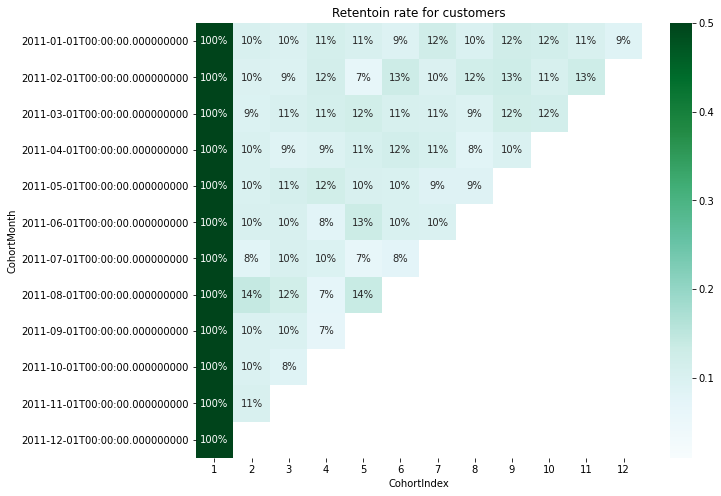

In [37]:
# Build a figure
plt.figure(figsize = (10, 8))
plt.title('Retentoin rate for customers')

# Initialize a heatmap grapgh 
sns.heatmap(data = retention, annot = True, fmt = '.0%', vmin = 0.01, vmax = 0.5, cmap = 'BuGn')

# show the retention graph
plt.show()

In [38]:
grouping_avg_quantity = cohort_analysis.groupby(['CohortMonth', 'CohortIndex'])

# Extract Quantity column from grouping and calculate its mean value
cohort_data_avg_quantity = grouping_avg_quantity['Qty'].mean().reset_index()

# average quantity table similar to retention but showing the change in quantity of products purchased
average_quantity = cohort_data_avg_quantity.pivot(index = 'CohortMonth', columns = 'CohortIndex', values = 'Qty')
average_quantity.round(1).fillna('')

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2011-01-01,2.7,1.3,1.7,1.9,1.7,2.7,2.4,1.9,2.1,2.0,2.7,2.7
2011-02-01,2.4,2.8,2.1,2.3,2.1,2.1,2.1,2.8,2.5,2.5,2.1,
2011-03-01,2.4,2.9,2.4,2.3,2.4,2.4,2.1,2.5,1.7,2.4,,
2011-04-01,2.5,2.5,2.6,2.4,2.7,2.3,2.2,2.3,2.2,,,
2011-05-01,2.5,2.4,1.7,2.0,1.9,2.7,2.6,2.6,,,,
2011-06-01,2.7,2.3,2.1,2.6,2.6,2.2,1.8,,,,,
2011-07-01,2.4,2.3,2.7,2.3,2.2,1.4,,,,,,
2011-08-01,2.5,2.3,2.4,2.7,1.9,,,,,,,
2011-09-01,2.8,2.0,2.4,2.5,,,,,,,,


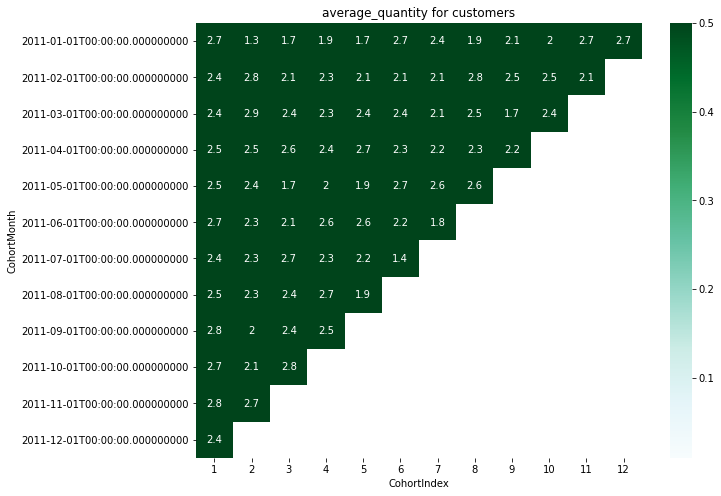

In [39]:
# Build a figure
plt.figure(figsize = (10, 8))
plt.title('average_quantity for customers')

# Initialize a heatmap grapgh 
sns.heatmap(data = average_quantity, annot = True, vmin = 0.01, vmax = 0.5, cmap = 'BuGn')

# show the retention graph
plt.show()

In [40]:
segments_df_list = []

for df, i in zip(rfm_analysis_group, periods):
    
    segments_df = df[['Recency','Frequency','MonetaryValue']]
    segments_df.reset_index(inplace=True)
    
    customer_for_segments = customer

    customer_for_segments['DOB'].fillna(customer_for_segments.DOB.mode(), inplace=True)
    customer_for_segments['Gender'].fillna(customer_for_segments.Gender.mode(), inplace=True)

    customer_for_segments['DOB'] = pd.to_datetime(customer_for_segments['DOB'])
    max_date = dt.datetime.strptime(i , "%Y-%m-%d")

    customer_for_segments['Age'] = ((max_date - customer_for_segments['DOB']) / np.timedelta64(1,'D')).astype(int)/365

    customer_for_segments = customer_for_segments.join(pd.get_dummies(customer_for_segments.Gender,
                                                                      prefix='Gender'))

    customer_for_segments = customer_for_segments.join(pd.get_dummies(customer_for_segments.city_code,
                                                                      prefix='City'))
    columns = ['DOB','Gender','city_code']
    customer_for_segments = customer_for_segments.drop(columns, axis=1)
    
    segments_df = segments_df.merge(customer_for_segments, how = 'left',
                                left_on=['cust_id'], right_on=['customer_Id'])
    
    tmp = full_data[full_data.tran_date <= i]
    df_return = tmp.groupby('cust_id').Qty.apply(lambda x: pd.Series([(x < 0).sum(), (x >= 0).sum()])).unstack()
    df_return.columns = ['Return', 'Not_Return']
    
    segments_df = segments_df.merge(df_return, how = 'left',
                                on = 'cust_id')
    
    pivot_category_df = pd.pivot_table(tmp, values='total_amt', index=['cust_id'],
                                   columns=['product_code_name'], aggfunc=np.mean, fill_value=0)
    
    segments_df = segments_df.merge(pivot_category_df, how = 'left',
                                on = 'cust_id')
    
    del segments_df['customer_Id']
    segments_df_list.append(segments_df)

In [41]:
with open(os.getcwd() + results_path + 'segments_df_list.pkl', 'wb') as f:
    pickle.dump(segments_df_list, f)

In [42]:
segments_df = segments_df_list[0]
segments_df.head()

,cust_id,Recency,Frequency,MonetaryValue,Age,Gender_F,Gender_M,City_1,City_10,City_2,...,Electronics_Computers,Electronics_Mobiles,Electronics_Personal Appliances,Footwear_Kids,Footwear_Mens,Footwear_Women,Home and kitchen_Bath,Home and kitchen_Furnishing,Home and kitchen_Kitchen,Home and kitchen_Tools
0,266783,710,4,14791.530,40.934247,0,1,0,0,0,...,0.0,0.0,0.00,0.0000,0.00,0.0000,0.0,0.0,0.0,0.0
1,266784,150,3,5694.065,22.986301,1,0,0,1,0,...,0.0,442.0,0.00,0.0000,0.00,0.0000,0.0,0.0,0.0,0.0
2,266785,701,7,35271.600,29.446575,1,0,0,0,0,...,0.0,0.0,0.00,5023.8825,2908.36,0.0000,0.0,0.0,0.0,0.0
3,266788,811,4,6092.970,42.731507,1,0,0,0,1,...,0.0,0.0,0.00,1927.1200,1312.74,0.0000,0.0,0.0,0.0,0.0
4,266794,1355,11,28253.745,43.789041,1,0,0,0,0,...,0.0,0.0,4610.06,0.0000,0.00,2240.3875,0.0,0.0,0.0,0.0


In [43]:
exclude = ['cust_id', 'Gender_F', 'Gender_M', 'City_1','City_10','City_2','City_3',
           'City_4','City_5','City_6','City_7','City_8','City_9']

scaler = StandardScaler()
scaler.fit(segments_df.loc[:, segments_df.columns.difference(exclude)])

StandardScaler()

In [44]:
scaled_values = scaler.transform(segments_df.loc[:, segments_df.columns.difference(exclude)])

In [45]:
segments_df.loc[:, segments_df.columns.difference(exclude)] = scaled_values
segments_df.head()

,cust_id,Recency,Frequency,MonetaryValue,Age,Gender_F,Gender_M,City_1,City_10,City_2,...,Electronics_Computers,Electronics_Mobiles,Electronics_Personal Appliances,Footwear_Kids,Footwear_Mens,Footwear_Women,Home and kitchen_Bath,Home and kitchen_Furnishing,Home and kitchen_Kitchen,Home and kitchen_Tools
0,266783,0.339689,0.113360,0.534967,1.145130,0,1,0,0,0,...,-0.304609,-0.320155,-0.307495,-0.313036,-0.302369,-0.319641,-0.315373,-0.311783,-0.312562,-0.319719
1,266784,-1.339320,-0.431283,-0.734173,-1.569755,1,0,0,1,0,...,-0.304609,0.053137,-0.307495,-0.313036,-0.302369,-0.319641,-0.315373,-0.311783,-0.312562,-0.319719
2,266785,0.312705,1.747289,3.392036,-0.592545,1,0,0,0,0,...,-0.304609,-0.320155,-0.307495,4.078131,2.308629,-0.319641,-0.315373,-0.311783,-0.312562,-0.319719
3,266788,0.642511,0.113360,-0.678524,1.416992,1,0,0,0,1,...,-0.304609,-0.320155,-0.307495,1.371380,0.876152,-0.319641,-0.315373,-0.311783,-0.312562,-0.319719
4,266794,2.273548,3.925860,2.413011,1.576959,1,0,0,0,0,...,-0.304609,-0.320155,3.705904,-0.313036,-0.302369,1.724829,-0.315373,-0.311783,-0.312562,-0.319719


In [46]:
segments_df.describe()

,Recency,Frequency,MonetaryValue,Age,Gender_F,Gender_M,City_1,City_10,City_2,City_3,...,Electronics_Computers,Electronics_Mobiles,Electronics_Personal Appliances,Footwear_Kids,Footwear_Mens,Footwear_Women,Home and kitchen_Bath,Home and kitchen_Furnishing,Home and kitchen_Kitchen,Home and kitchen_Tools
count,5.506000e+03,5.506000e+03,5.506000e+03,5.506000e+03,5506.000000,5506.000000,5506.000000,5506.000000,5506.000000,5506.000000,...,5.506000e+03,5.506000e+03,5.506000e+03,5.506000e+03,5.506000e+03,5.506000e+03,5.506000e+03,5.506000e+03,5.506000e+03,5.506000e+03
mean,1.064653e-16,-4.645757e-17,1.884113e-16,-1.109820e-16,0.486378,0.513258,0.097167,0.099165,0.099165,0.104613,...,6.129818e-17,-2.322879e-17,-2.193830e-17,-1.290488e-18,1.935732e-18,1.290488e-18,2.193830e-17,-6.581489e-17,1.096915e-17,5.613623e-17
std,1.000091e+00,1.000091e+00,1.000091e+00,1.000091e+00,0.499860,0.499870,0.296212,0.298910,0.298910,0.306082,...,1.000091e+00,1.000091e+00,1.000091e+00,1.000091e+00,1.000091e+00,1.000091e+00,1.000091e+00,1.000091e+00,1.000091e+00,1.000091e+00
min,-1.789055e+00,-1.520569e+00,-1.514803e+00,-1.728064e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.735890e+00,-1.761062e+00,-2.265133e+00,-2.356742e+00,-1.724265e+00,-2.440580e+00,-1.765278e+00,-7.583006e-01,-2.153390e+00,-2.736692e+00
25%,-7.336773e-01,-9.759257e-01,-7.513229e-01,-8.810873e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.046091e-01,-3.201549e-01,-3.074947e-01,-3.130360e-01,-3.023691e-01,-3.196411e-01,-3.153727e-01,-3.117825e-01,-3.125619e-01,-3.197190e-01
50%,1.268149e-01,1.133601e-01,-1.718238e-01,4.223863e-03,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-3.046091e-01,-3.201549e-01,-3.074947e-01,-3.130360e-01,-3.023691e-01,-3.196411e-01,-3.153727e-01,-3.117825e-01,-3.125619e-01,-3.197190e-01
75%,7.714346e-01,6.580030e-01,5.909245e-01,8.703680e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-3.046091e-01,-3.201549e-01,-3.074947e-01,-3.130360e-01,-3.023691e-01,-3.196411e-01,-3.153727e-01,-3.117825e-01,-3.125619e-01,-3.197190e-01
max,2.489421e+00,3.925860e+00,5.973017e+00,1.751846e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.887759e+00,6.660405e+00,6.888148e+00,6.930724e+00,7.078265e+00,7.243135e+00,6.958414e+00,6.808500e+00,7.072271e+00,7.034925e+00


In [47]:
segments_df.iloc[0:5,1:]

,Recency,Frequency,MonetaryValue,Age,Gender_F,Gender_M,City_1,City_10,City_2,City_3,...,Electronics_Computers,Electronics_Mobiles,Electronics_Personal Appliances,Footwear_Kids,Footwear_Mens,Footwear_Women,Home and kitchen_Bath,Home and kitchen_Furnishing,Home and kitchen_Kitchen,Home and kitchen_Tools
0,0.339689,0.113360,0.534967,1.145130,0,1,0,0,0,0,...,-0.304609,-0.320155,-0.307495,-0.313036,-0.302369,-0.319641,-0.315373,-0.311783,-0.312562,-0.319719
1,-1.339320,-0.431283,-0.734173,-1.569755,1,0,0,1,0,0,...,-0.304609,0.053137,-0.307495,-0.313036,-0.302369,-0.319641,-0.315373,-0.311783,-0.312562,-0.319719
2,0.312705,1.747289,3.392036,-0.592545,1,0,0,0,0,1,...,-0.304609,-0.320155,-0.307495,4.078131,2.308629,-0.319641,-0.315373,-0.311783,-0.312562,-0.319719
3,0.642511,0.113360,-0.678524,1.416992,1,0,0,0,1,0,...,-0.304609,-0.320155,-0.307495,1.371380,0.876152,-0.319641,-0.315373,-0.311783,-0.312562,-0.319719
4,2.273548,3.925860,2.413011,1.576959,1,0,0,0,0,0,...,-0.304609,-0.320155,3.705904,-0.313036,-0.302369,1.724829,-0.315373,-0.311783,-0.312562,-0.319719


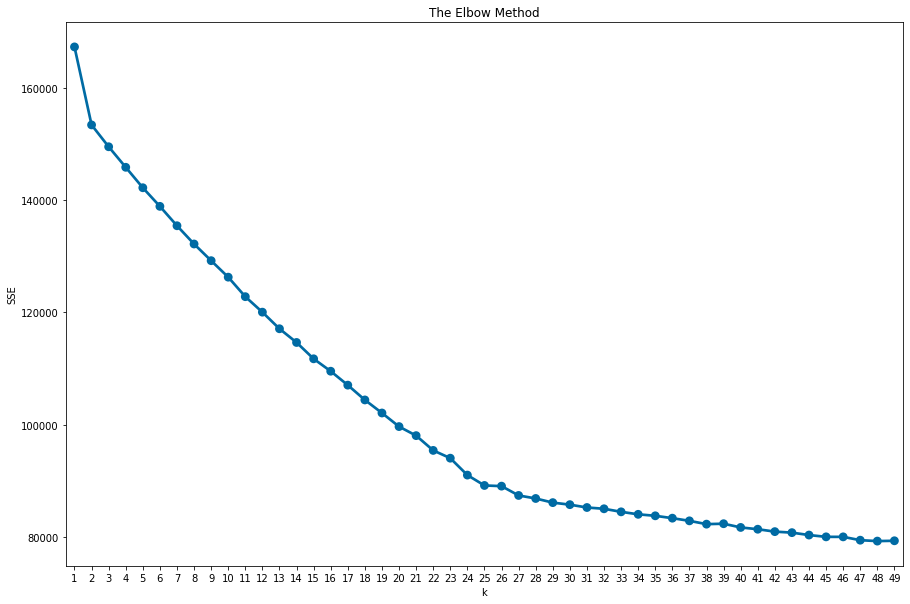

In [48]:
sse = {}

for k in range(1, 50):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters = k, random_state = 123)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(segments_df.iloc[:,1:])
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x = list(sse.keys()), y = list(sse.values()))
plt.show()

In [49]:
# Initialisation of KMeans algorithm with number of cluster 4 (why I choose this I explain further)
kmeans = KMeans(n_clusters = 20, random_state = 42)

# Fit k-means cluster algorithm on the normalized data (rfm_normalized)
kmeans.fit(segments_df.iloc[:,1:])

# Extract the obtained cluster labels
cluster_labels = kmeans.labels_

In [50]:
exclude = ['cust_id', 'Gender_F', 'Gender_M', 'City_1','City_10','City_2','City_3',
           'City_4','City_5','City_6','City_7','City_8','City_9']

inversed = scaler.inverse_transform(scaled_values)
segments_df.loc[:, segments_df.columns.difference(exclude)] = inversed
segments_df.head()

,cust_id,Recency,Frequency,MonetaryValue,Age,Gender_F,Gender_M,City_1,City_10,City_2,...,Electronics_Computers,Electronics_Mobiles,Electronics_Personal Appliances,Footwear_Kids,Footwear_Mens,Footwear_Women,Home and kitchen_Bath,Home and kitchen_Furnishing,Home and kitchen_Kitchen,Home and kitchen_Tools
0,266783,710.0,4.0,14791.530,40.934247,0,1,0,0,0,...,0.0,0.0,0.00,-5.684342e-14,0.00,0.0000,0.0,0.0,0.0,0.0
1,266784,150.0,3.0,5694.065,22.986301,1,0,0,1,0,...,0.0,442.0,0.00,-5.684342e-14,0.00,0.0000,0.0,0.0,0.0,0.0
2,266785,701.0,7.0,35271.600,29.446575,1,0,0,0,0,...,0.0,0.0,0.00,5.023883e+03,2908.36,0.0000,0.0,0.0,0.0,0.0
3,266788,811.0,4.0,6092.970,42.731507,1,0,0,0,1,...,0.0,0.0,0.00,1.927120e+03,1312.74,0.0000,0.0,0.0,0.0,0.0
4,266794,1355.0,11.0,28253.745,43.789041,1,0,0,0,0,...,0.0,0.0,4610.06,-5.684342e-14,0.00,2240.3875,0.0,0.0,0.0,0.0


In [51]:
# Create a DataFrame by adding a new cluster label column
segments_df['Cluster'] = cluster_labels

cluster_avg = segments_df.iloc[:,1:].groupby(['Cluster']).mean()

cluster_avg.head()

,Recency,Frequency,MonetaryValue,Age,Gender_F,Gender_M,City_1,City_10,City_2,City_3,...,Electronics_Computers,Electronics_Mobiles,Electronics_Personal Appliances,Footwear_Kids,Footwear_Mens,Footwear_Women,Home and kitchen_Bath,Home and kitchen_Furnishing,Home and kitchen_Kitchen,Home and kitchen_Tools
Cluster,,,,,,,,,,,,,,,,,,,,,
0,699.510870,4.396739,14533.830788,33.907817,0.456522,0.543478,0.054348,0.103261,0.086957,0.163043,...,179.850761,247.105625,318.053832,428.478764,362.099692,211.247174,352.332853,242.097092,259.909212,244.657409
1,630.285714,4.416149,14418.307671,33.225542,0.490683,0.509317,0.118012,0.086957,0.111801,0.086957,...,329.705233,268.432640,225.127164,600.299829,5163.934959,179.456118,344.389379,200.245217,285.270735,385.585518
2,665.398964,4.248705,13734.972513,32.729250,0.440415,0.559585,0.082902,0.077720,0.098446,0.113990,...,230.186386,291.288687,212.809832,182.949067,236.609318,296.339434,516.570801,290.800121,202.369585,463.693497
3,681.858696,4.293478,13446.108424,32.726444,0.527174,0.472826,0.108696,0.141304,0.076087,0.114130,...,287.936576,174.262704,173.386911,398.122292,362.906422,4801.857572,335.690793,177.226386,546.350435,242.745679
4,675.076503,4.207650,13661.567869,33.156434,0.475410,0.524590,0.098361,0.103825,0.109290,0.076503,...,202.882227,255.933297,227.125806,429.337787,192.768156,156.094836,361.042145,209.358251,394.020055,415.957022


In [52]:
# Calculate average RFM values for the total customer population
population_avg = segments_df.iloc[:,1:].mean()

In [53]:
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1

# Print relative importance scores rounded to 2 decimals
relative_imp.head()

,Age,Bags_Mens,Bags_Women,Books_Academic,Books_Children,Books_Comics,Books_DIY,Books_Fiction,Books_Non-Fiction,City_1,...,Gender_F,Gender_M,Home and kitchen_Bath,Home and kitchen_Furnishing,Home and kitchen_Kitchen,Home and kitchen_Tools,MonetaryValue,Not_Return,Recency,Return
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.016304,-0.239672,-0.231934,-0.594193,12.668669,-0.340577,-0.161649,0.308501,-0.096084,-0.440675,...,-0.061386,0.058879,-0.018804,-0.325221,-0.252548,-0.315892,0.326470,0.159630,0.172292,0.168366
1,-0.004146,-0.567120,-0.492793,-0.576694,-0.043944,-0.450576,-0.154568,0.009779,-0.520163,0.214535,...,0.008851,-0.007679,-0.040926,-0.441872,-0.179613,0.078169,0.315926,0.164750,0.056280,-0.026034
2,-0.019021,-0.410682,-0.094484,-0.408512,-0.640305,-0.411928,-0.500827,0.003475,-0.230165,-0.146811,...,-0.094503,0.090261,0.438574,-0.189475,-0.418022,0.296574,0.253560,0.120587,0.115125,-0.213730
3,-0.019105,-0.323692,-0.197609,-0.453998,-0.253125,-0.408704,-0.544955,-0.237986,-0.367092,0.118651,...,0.083876,-0.078776,-0.065150,-0.506030,0.571205,-0.321238,0.227196,0.132396,0.142710,-0.079053
4,-0.006217,-0.456085,0.190166,-0.108056,-0.647975,-0.593827,-0.073766,0.201259,-0.298788,0.012287,...,-0.022552,0.022078,0.005450,-0.416471,0.133130,0.163094,0.246860,0.109759,0.131343,-0.184585


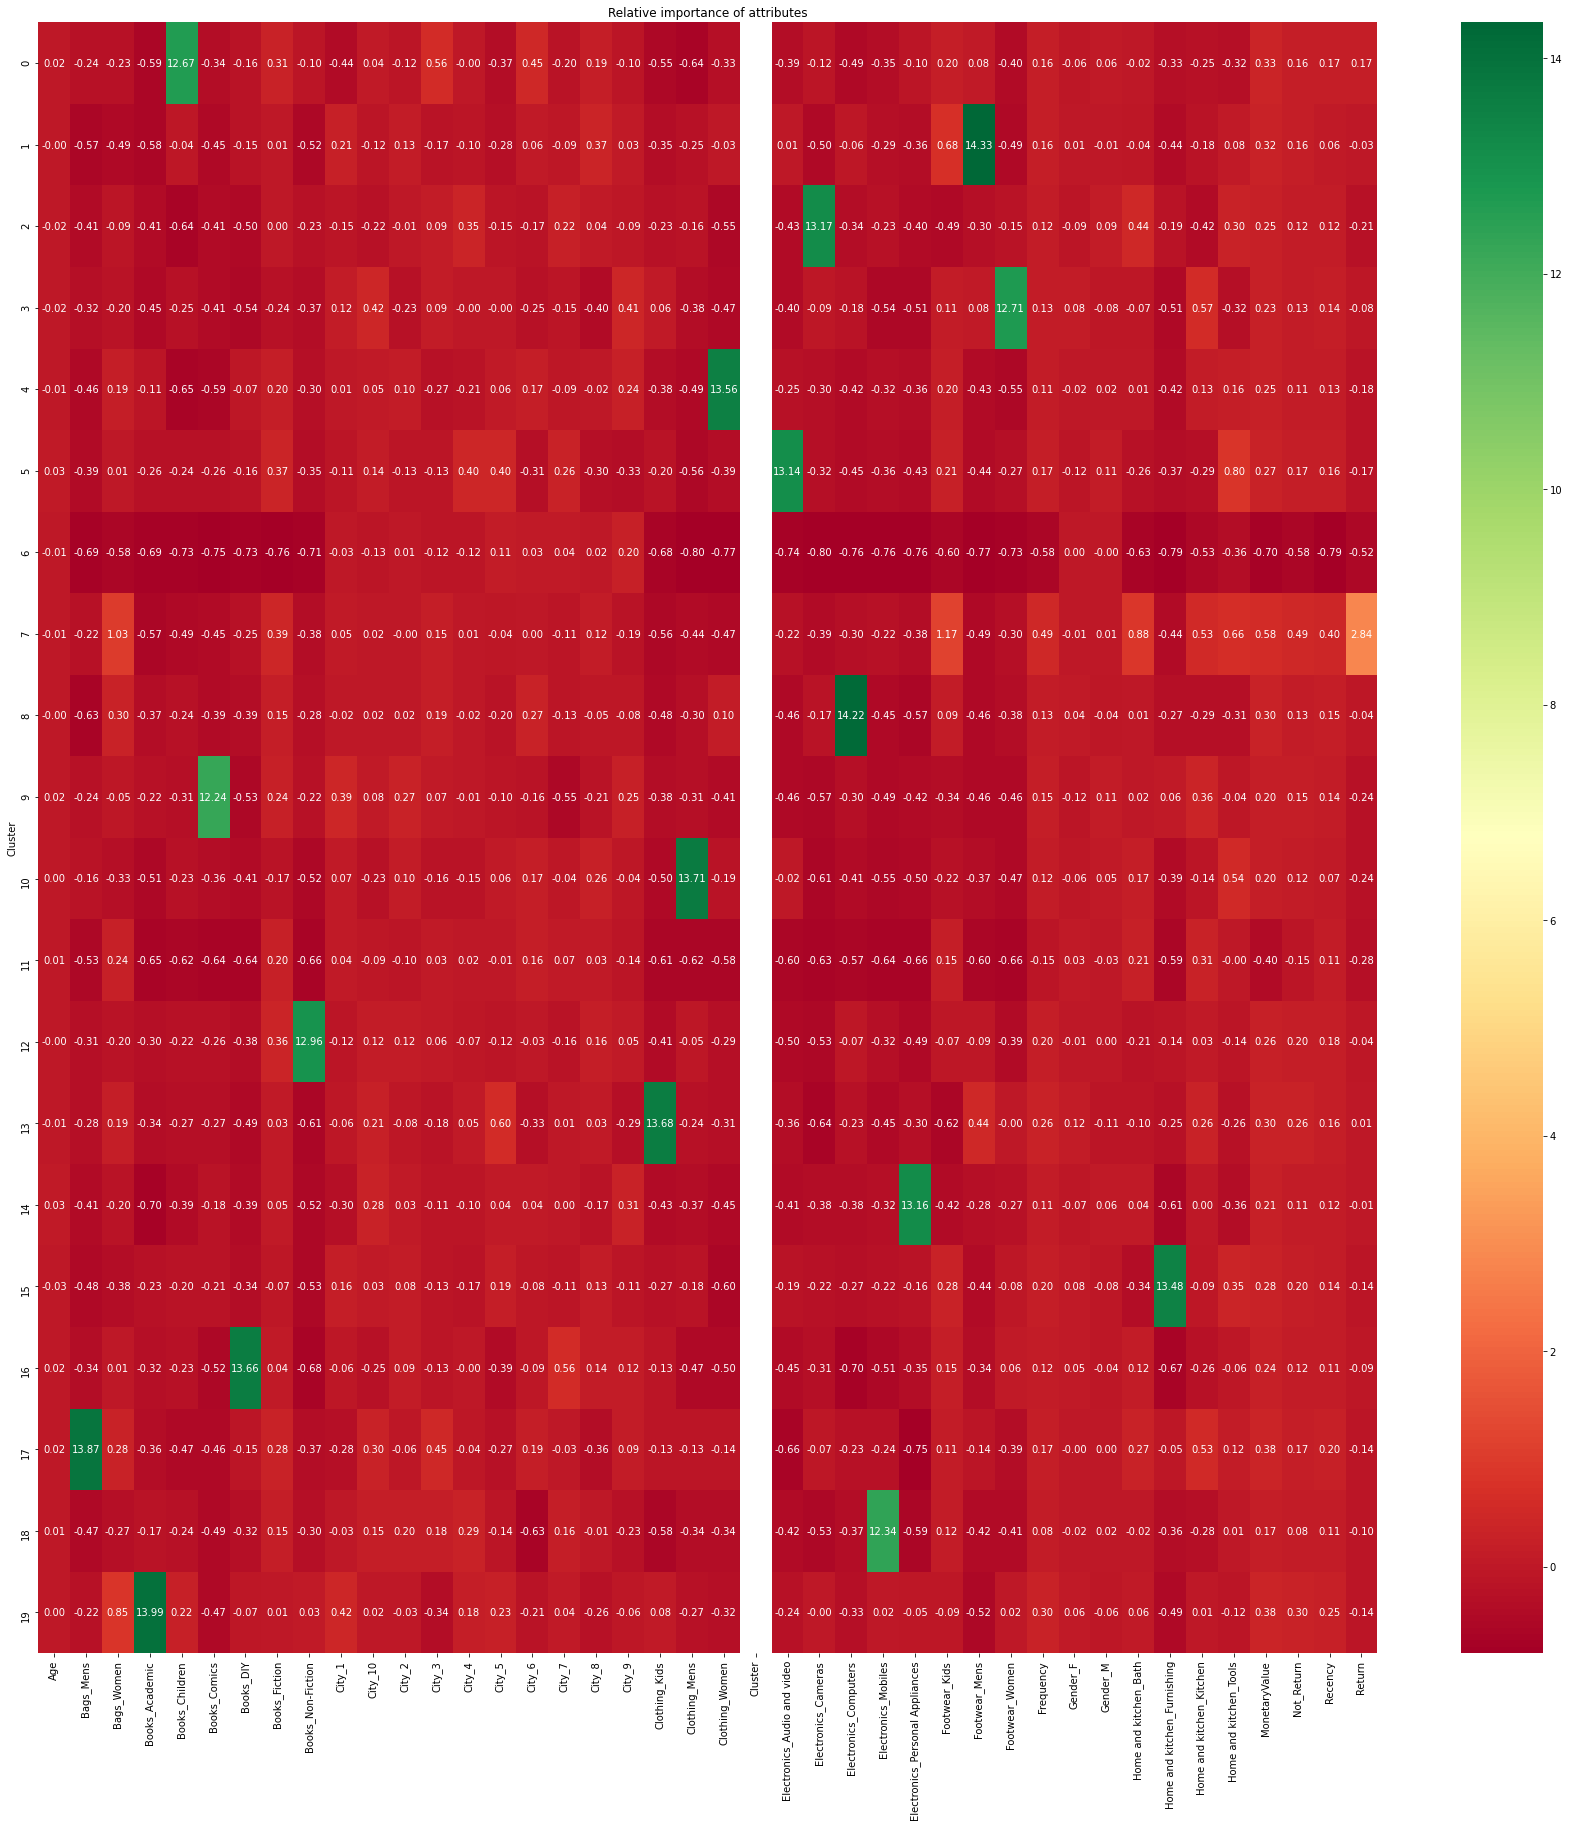

In [54]:
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize = (30, 30))

# Add the plot title
plt.title('Relative importance of attributes')

# Plot the heatmap
sns.heatmap(data = relative_imp, annot = True, fmt='.2f', cmap='RdYlGn')
plt.show()

In [55]:
exclude = ['Gender_F', 'Gender_M', 'City_1','City_10','City_2','City_3',
           'City_4','City_5','City_6','City_7','City_8','City_9']
scaled_values = scaler.transform(cluster_avg.loc[:, cluster_avg.columns.difference(exclude)])

cluster_avg.loc[:, cluster_avg.columns.difference(exclude)] = scaled_values
cluster_avg.head()

,Recency,Frequency,MonetaryValue,Age,Gender_F,Gender_M,City_1,City_10,City_2,City_3,...,Electronics_Computers,Electronics_Mobiles,Electronics_Personal Appliances,Footwear_Kids,Footwear_Mens,Footwear_Women,Home and kitchen_Bath,Home and kitchen_Furnishing,Home and kitchen_Kitchen,Home and kitchen_Tools
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.308240,0.329441,0.499017,0.082282,0.456522,0.543478,0.054348,0.103261,0.086957,0.163043,...,-0.148524,-0.111461,-0.030605,0.061479,0.022708,-0.126867,-0.005930,-0.101398,-0.078937,-0.100997
1,0.100687,0.340013,0.482901,-0.020922,0.490683,0.509317,0.118012,0.086957,0.111801,0.086957,...,-0.018472,-0.093450,-0.111505,0.211661,4.333586,-0.155878,-0.012907,-0.137768,-0.056140,0.024992
2,0.205965,0.248815,0.387572,-0.095994,0.440415,0.559585,0.082902,0.077720,0.098446,0.113990,...,-0.104840,-0.074147,-0.122228,-0.153128,-0.089952,-0.049216,0.138314,-0.059075,-0.130658,0.094820
3,0.255315,0.273201,0.347274,-0.096418,0.527174,0.472826,0.108696,0.141304,0.076087,0.114130,...,-0.054721,-0.172981,-0.156549,0.034946,0.023432,4.062305,-0.020547,-0.157771,0.178537,-0.102706
4,0.234981,0.226455,0.377332,-0.031376,0.475410,0.524590,0.098361,0.103825,0.109290,0.076503,...,-0.128536,-0.104006,-0.109765,0.062230,-0.129310,-0.177196,0.001719,-0.129849,0.041611,0.052144


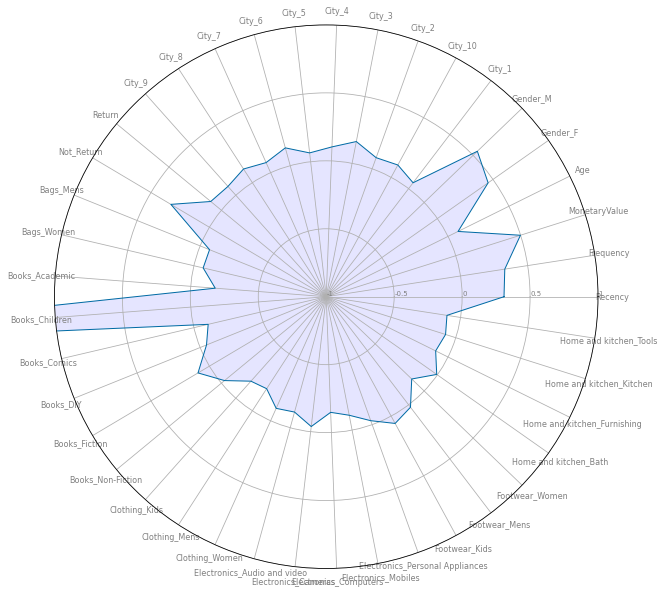

In [56]:
categories = list(cluster_avg.columns)
# number of variable
N = len(cluster_avg.iloc[0,:])

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:

values = cluster_avg.iloc[0,:].values.flatten().tolist()
values += values[:1]

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([-1, -0.5, 0, 0.5, 1], ['-1', '-0.5', '0', '0.5', '1'], color="grey", size=7)
plt.ylim(-1,1)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

# Show the graph
plt.show()

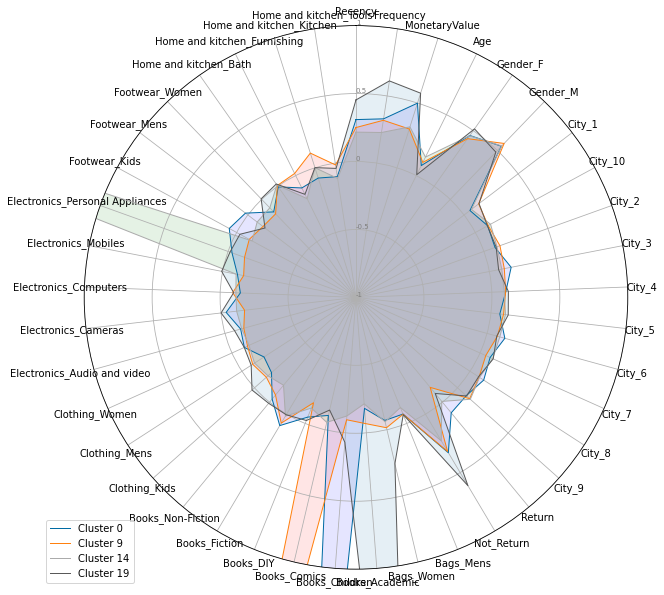

In [57]:
categories = list(cluster_avg.columns)
# number of variable
N = len(cluster_avg.iloc[0,:])
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([-1, -0.5, 0, 0.5, 1], ['-1', '-0.5', '0', '0.5', '1'], color="grey", size=7)
plt.ylim(-1,1)


# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 
# Ind1
values = cluster_avg.iloc[0,:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 0")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values = cluster_avg.iloc[9,:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 9")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values = cluster_avg.iloc[14,:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 14")
ax.fill(angles, values, 'g', alpha=0.1)

# Ind4
values = cluster_avg.iloc[19,:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 19")
ax.fill(angles, values, 'o', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()